2018년 연봉 예측 프로그램 구현

In [1]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor  # 회귀 - 예측
from sklearn.linear_model import LinearRegression    # 선형 회귀
from sklearn.preprocessing import PolynomialFeatures  # 다항특성 만들어주는 라이브러리
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글 설정
matplotlib.rcParams['font.size'] = 10 #글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
# 연봉(2018) = target

In [3]:
# 데이터 불러오기
# 데이터 확인 - nan, 0, 피쳐(컬럼), 타입, 데이터 간격 
# , 문자 타입: 삭제 or 아스키코드 or 원핫인코딩
# , 서로 데이터 간 상관관계

# 데이터 전처리 - data, result 값 분리
# train, test_set 분리

# 데이터 실습

# 데이터 예측
# 데이터 예측률 구하기

In [4]:
df = pd.read_csv('../z20_data/picher_stats_2017.csv')

In [5]:
df_dumm = pd.get_dummies(df['팀명'])
df = pd.concat([df_dumm,df.iloc[:,2:].astype(float)],axis=1)

In [6]:
target = df['연봉(2018)'].to_numpy()
input = df

In [7]:
input

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화,승,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,False,False,False,False,True,False,False,False,False,16.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000.0,85000.0
1,False,False,True,False,False,False,False,False,False,11.0,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000.0,50000.0
2,True,False,False,False,False,False,False,False,False,20.0,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000.0,150000.0
3,False,False,True,False,False,False,False,False,False,10.0,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000.0,100000.0
4,False,False,False,False,False,False,True,False,False,13.0,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000.0,85000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,False,False,False,False,False,False,False,False,True,2.0,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100.0,8100.0
148,True,False,False,False,False,False,False,False,False,3.0,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500.0,3100.0
149,False,False,False,False,False,False,True,False,False,0.0,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000.0,16000.0
150,False,False,False,False,False,False,False,True,False,0.0,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000.0,2900.0


In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    input, target, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [10]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

1.0
1.0


In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [12]:
lr = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [13]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

1.0
0.9999997688227785


In [14]:
# 규제 위한 표준화 작업
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [15]:
# 릿지 규제
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1000)
ridge.fit(train_scaled, train_target)

Ridge(alpha=1000)

In [16]:
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9541297639400785
0.8212265457553354


In [17]:
from sklearn.linear_model import Ridge
alpha_list = [0.001,0.01,0.1,1,10,100,1000]
train_list = []
test_list = []
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_list.append(ridge.score(train_scaled,train_target))
    test_list.append(ridge.score(test_scaled,test_target))

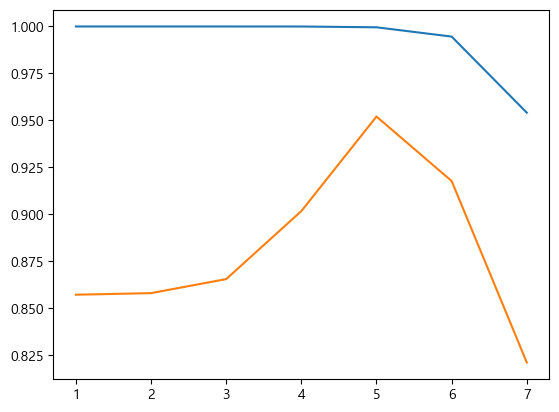

In [18]:
x = np.arange(1,8).reshape(-1,1)
plt.plot(x,train_list)
plt.plot(x,test_list)